<a href="https://colab.research.google.com/github/daniellcosmo/CBM_Naval_Propulsion_Plant/blob/main/CBM_Naval_Propulsion_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema

Datase: http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants


y1 [GT Compressor decay state coefficient] <br>
y2 [GT Turbine decay state coefficient]


#Importação dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor # Ensemble using averaging method
from xgboost import XGBRegressor # Ensemble using boosting method
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import time
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.graph_objects as go
#import plotly.graph_objs as go

In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/TCC/' # Colab
#path = '' # PC

In [ ]:
df = pd.read_csv(path + 'data.txt', sep="   ", header=None, engine='python')

Features = [
 'lever_position',
 'ship_speed',
 'GT_shaft_torque',
 'GT_rpm',
 'GG_rpm',
 'S_prplr_torque',
 'P_prplr_torque',
 'HP_T_exit_temp',
 'GT_C_airIn_temp',
 'GT_C_airOut_temp',
 'HP_T_exit_pressure',
 'GT_C_airIn_pressure',
 'GT_C_airOut_pressure',
 'GT_exhGas_pressure',
 'T_inj_control',
 'fuel_flow',
 'GT_C_decay_coef',
 'GT_T_decay_coef']
df.columns = Features
df.head()

,lever_position,ship_speed,GT_shaft_torque,GT_rpm,GG_rpm,S_prplr_torque,P_prplr_torque,HP_T_exit_temp,GT_C_airIn_temp,GT_C_airOut_temp,HP_T_exit_pressure,GT_C_airIn_pressure,GT_C_airOut_pressure,GT_exhGas_pressure,T_inj_control,fuel_flow,GT_C_decay_coef,GT_T_decay_coef
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
with open(path + "Features.txt", 'r') as f:
  lines = f.readlines() 

FeaturesNames = []
for i in range(0, len(lines)):
    FeaturesNames.append(lines[i].rstrip('\n'))

FeaturesNames

['1 - Lever position (lp) [ ]',
 '2 - Ship speed (v) [knots]',
 '3 - Gas Turbine shaft torque (GTT) [kN m]',
 '4 - Gas Turbine rate of revolutions (GTn) [rpm]',
 '5 - Gas Generator rate of revolutions (GGn) [rpm]',
 '6 - Starboard Propeller Torque (Ts) [kN]',
 '7 - Port Propeller Torque (Tp) [kN]',
 '8 - HP Turbine exit temperature (T48) [C]',
 '9 - GT Compressor inlet air temperature (T1) [C]',
 '10 - GT Compressor outlet air temperature (T2) [C]',
 '11 - HP Turbine exit pressure (P48) [bar]',
 '12 - GT Compressor inlet air pressure (P1) [bar]',
 '13 - GT Compressor outlet air pressure (P2) [bar]',
 '14 - Gas Turbine exhaust gas pressure (Pexh) [bar]',
 '15 - Turbine Injecton Control (TIC) [%]',
 '16 - Fuel flow (mf) [kg/s]',
 '17 - GT Compressor decay state coefficient.',
 '18 - GT Turbine decay state coefficient. ']

#2. Análise dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lever_position        11934 non-null  float64
 1   ship_speed            11934 non-null  float64
 2   GT_shaft_torque       11934 non-null  float64
 3   GT_rpm                11934 non-null  float64
 4   GG_rpm                11934 non-null  float64
 5   S_prplr_torque        11934 non-null  float64
 6   P_prplr_torque        11934 non-null  float64
 7   HP_T_exit_temp        11934 non-null  float64
 8   GT_C_airIn_temp       11934 non-null  float64
 9   GT_C_airOut_temp      11934 non-null  float64
 10  HP_T_exit_pressure    11934 non-null  float64
 11  GT_C_airIn_pressure   11934 non-null  float64
 12  GT_C_airOut_pressure  11934 non-null  float64
 13  GT_exhGas_pressure    11934 non-null  float64
 14  T_inj_control         11934 non-null  float64
 15  fuel_flow          

In [ ]:
df.describe()

,lever_position,ship_speed,GT_shaft_torque,GT_rpm,GG_rpm,S_prplr_torque,P_prplr_torque,HP_T_exit_temp,GT_C_airOut_temp,HP_T_exit_pressure,GT_C_airOut_pressure,GT_exhGas_pressure,T_inj_control,fuel_flow,GT_C_decay_coef,GT_T_decay_coef
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,646.215331,2.352963,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,72.675882,1.084770,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,540.442000,1.093000,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,578.092250,1.389000,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,637.141500,2.083000,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,693.924500,2.981000,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,789.094000,4.560000,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


##BoxPlot Normalizado

In [ ]:
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = Features

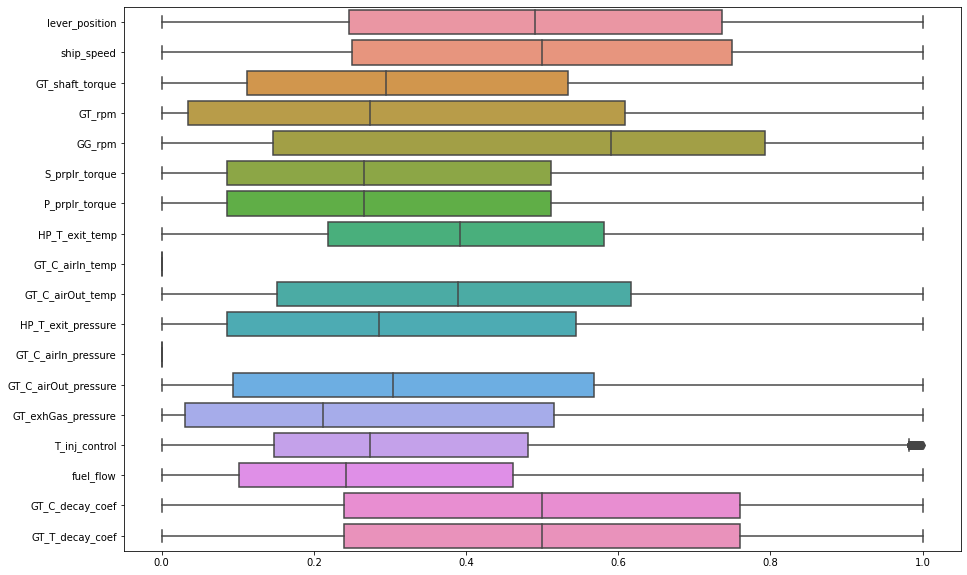

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
_= sns.boxplot(data=normalized_df, dodge=False, orient="h")

Como é possível visualizar, as features: 
*   GT_C__airIn_pressure; e
*   GT_C__airIn_temp

possuem std igual a zero, comportando-se como constante sem fazer um impacto no resultado final.
<br>
Dado isso, podemos removê-las do modelo.

In [ ]:
try:
  f1 = 'GT_C_airIn_temp'
  f2 = 'GT_C_airIn_pressure'
  df=df.drop(f1, axis=1)
  print('Removida feature ', f1)
  df=df.drop(f2, axis=1)
  print('Removida feature ', f2)
except Exception:
  print('Feature(s) já não se encontram no DataFrame')
  pass

Removida feature  GT_C_airIn_temp
Removida feature  GT_C_airIn_pressure


##Histograma de Frequências e Distribuição Normal

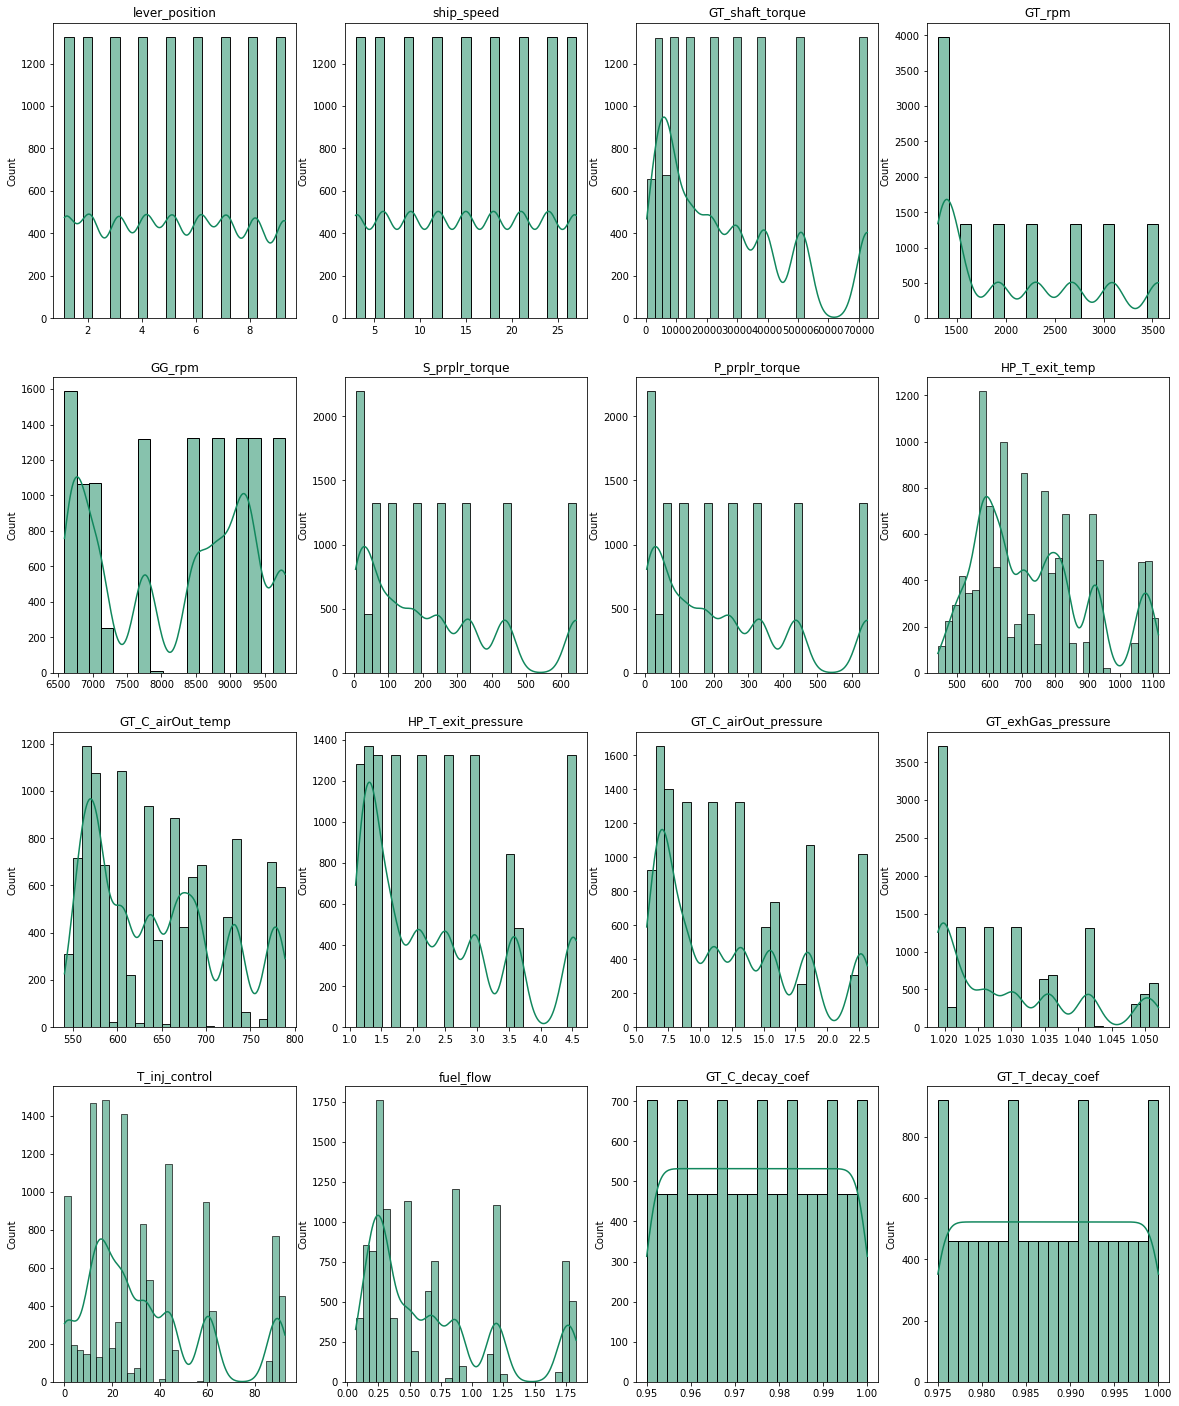

In [ ]:
# sns.displot(df['lever_position'], kde=True)
# https://www.biomooc.com/color/seabornColors.html

fig, axes = plt.subplots(nrows = 4, ncols = 4)    # axes is 2d array (4x4)
axes = axes.flatten()         # Convert axes to 1d array of length nrows x rcols
fig.set_size_inches(20, 25)

for ax, col in zip(axes, df.columns):
  sns.histplot(df[col], ax = ax, kde=True, color=sns.xkcd_rgb['dark sea green'], label="Compact").set(xlabel=None)
  ax.set_title(col)



##Teste de Normalidade de Kolmogorov-Smirnov
>https://dev4lab.github.io/posts/teste-normalidade/



In [ ]:
testeNormal = pd.DataFrame(index=[ "Segue Distribuição Normal?"])

for col in df.columns:
    stat,p= stats.normaltest(df[col])
    if p<=0.05:
        testeNormal[col] = 'Não'
    else:
        testeNormal[col] = 'Sim'

testeNormal = testeNormal.T
testeNormal

,Segue Distribuição Normal?
lever_position,Não
ship_speed,Não
GT_shaft_torque,Não
GT_rpm,Não
GG_rpm,Não
S_prplr_torque,Não
P_prplr_torque,Não
HP_T_exit_temp,Não
GT_C_airOut_temp,Não
HP_T_exit_pressure,Não


Ou seja, o valor-p foi menor do que nosso nível de significância, logo, a probabilidade de obtermos dados como estes é muito pequena. Assim, podemos concluir que os valores não seguem distribuição normal.

## Heatmap

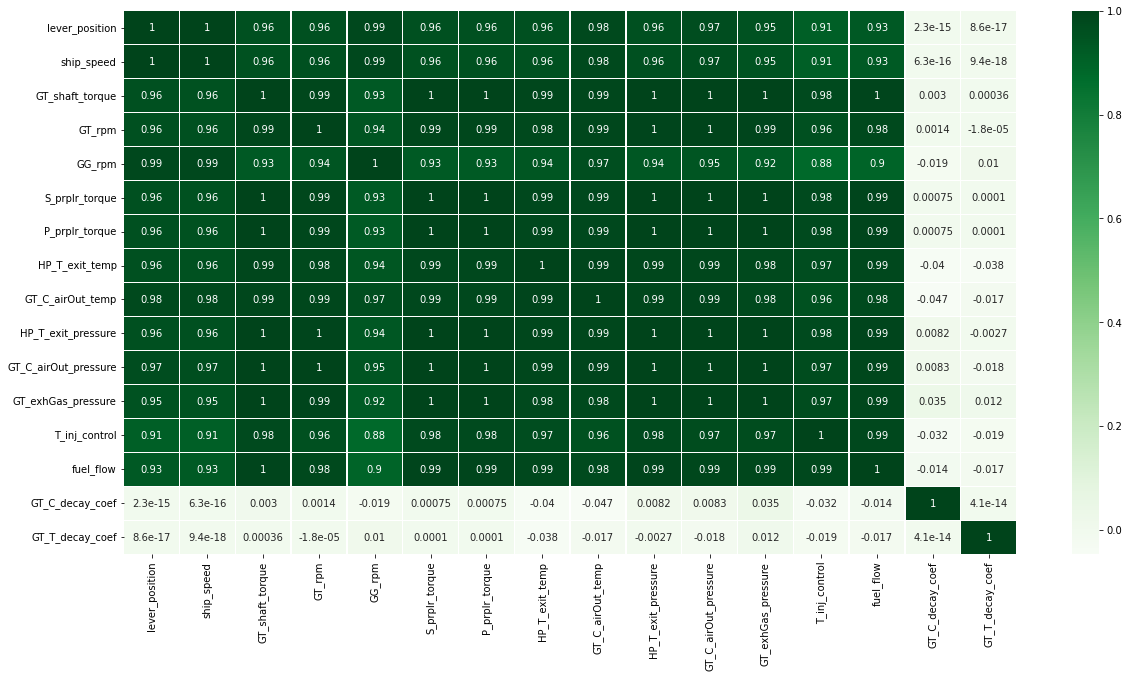

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
_= sns.heatmap(df.corr(), cmap = 'Greens', linewidth=0.5, annot=True)

Como as features tem uma alta correlação entre elas e uma baixa entre as respostas podemos assumir que as features e as respostas possuem uma não-linearidade entre si. 

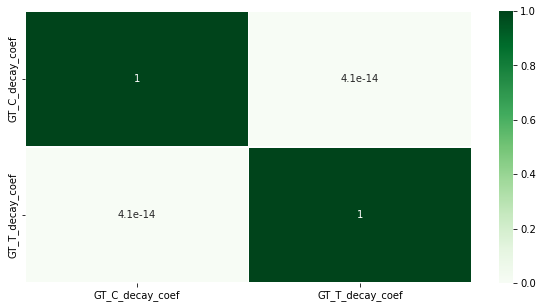

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
_= sns.heatmap(df.iloc[: , -2:].corr(), cmap = 'Greens', linewidth=0.5, annot=True)

Como as respostas também possuem uma baixa correlação entre si, iremos considerá-las independentes, com isso, usá-las em treinos diferentes

#Divisão de Dados

## Features e Targets

In [ ]:
X = df.iloc[: , :-2]
y1 = df['GT_C_decay_coef']
y2 = df['GT_T_decay_coef']


## Treino e Teste

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X,y1)
x2_train,x2_test,y2_train,y2_test = train_test_split(X,y2)

# Modelagem e Inferência

## Sugestão de Modelos

* k-NN;
* Neural Net;
* Linear Regression;
* Support Vector Machine;
* Default Model;
* Vector Machine Regression;
* Local Polynomial Regression;
* Deep Learning;
* Generalized Linear Model.
<br>


## Modelos Candidatos e Métricas

In [ ]:
models = {'SVR' : SVR(),
          'KNeighborsRegressor': KNeighborsRegressor(), 
          'DecisionTreeRegressor': DecisionTreeRegressor(), 
          'BaggingRegressor': BaggingRegressor(), 
          'XGBRegressor': XGBRegressor()}

In [ ]:
def train_models(x_train, y_train, x_test, y_test, models):
  y_info = pd.DataFrame(columns=['Model','Train Time', 'Mean Absolute Error', 'Mean Absolute Percentual Error', 'Mean Squared  Error',
                                 'Root Mean Squared  Error','Train Accuracy (R²)', 'Test Accuracy (R²)', 'Y Predicted Test'], 
                       index = models.keys())
  y_preds = models
  for i, model in enumerate(models.keys()):
    start_time = time.perf_counter()
    y_info.loc[y_info.index[i], 'Model'] = models[model].fit(x_train, y_train)
    y_info.loc[y_info.index[i], 'Train Time'] = time.perf_counter() - start_time

    # https://medium.com/data-hackers/prevendo-n%C3%BAmeros-entendendo-m%C3%A9tricas-de-regress%C3%A3o-35545e011e70
    # https://scikit-learn.org/stable/modules/model_evaluation.html
    y_info.loc[y_info.index[i], 'Train Accuracy (R²)'] = models[model].score(x_train, y_train)
    y_info.loc[y_info.index[i], 'Test Accuracy (R²)'] = models[model].score(x_test, y_test)
    y_pred = models[model].predict(x_test)
    y_info.loc[y_info.index[i], 'Mean Absolute Error'] = mean_absolute_error(y_test, y_pred)
    y_info.loc[y_info.index[i], 'Mean Absolute Percentual Error'] = metrics.mean_absolute_percentage_error(y_test, y_pred)
    y_info.loc[y_info.index[i], 'Mean Squared  Error'] = mean_squared_error(y_test, y_pred)
    y_info.loc[y_info.index[i], 'Root Mean Squared  Error'] = np.sqrt(mean_squared_error(y_test, y_pred))
    y_info.loc[y_info.index[i], 'Y Predicted Test'] = y_pred

  return y_info

## Modelos sem Redução de Dimensionalidade

### Modelos para y1

In [ ]:
y1_models = train_models(x1_train, y1_train, x1_test, y1_test, models)
y1_models.drop(['Model'], axis=1).drop(['Y Predicted Test'], axis=1)

[11:06:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train Time,Mean Absolute Error,Mean Absolute Percentual Error,Mean Squared Error,Root Mean Squared Error,Train Accuracy (R²),Test Accuracy (R²)
SVR,0.009707,0.01277,0.01311,0.000216,0.014691,-0.000072,-0.000655
KNeighborsRegressor,0.016481,0.001468,0.001509,0.000016,0.003973,0.962852,0.926803
DecisionTreeRegressor,0.124184,0.000978,0.001004,0.000002,0.001562,1.0,0.988688
BaggingRegressor,0.802307,0.000625,0.000641,0.000001,0.001195,0.998441,0.993379
XGBRegressor,0.861647,0.00305,0.003131,0.000017,0.004122,0.926828,0.921212


### Modelos para y2

In [ ]:
y2_models = train_models(x2_train, y2_train, x2_test, y2_test, models)
y2_models.drop(['Model'], axis=1)

[14:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train Time,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Train Accuracy,Test Accuracy
SVR,0.005996,0.006579,0.000057,0.007561,-0.000117,-0.001028
KNeighborsRegressor,0.012372,0.001097,0.000007,0.002619,0.928135,0.879916
DecisionTreeRegressor,0.099394,0.000545,0.000002,0.001322,1.0,0.969389
BaggingRegressor,0.632735,0.000441,0.000001,0.000964,0.997092,0.983738
XGBRegressor,0.481458,0.002556,0.000011,0.00338,0.816078,0.799905


## Redução de Dimensionalidade

### Modelos usando Redução de Dimensionalidade (Sem PCA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lever_position        11934 non-null  float64
 1   ship_speed            11934 non-null  float64
 2   GT_shaft_torque       11934 non-null  float64
 3   GT_rpm                11934 non-null  float64
 4   GG_rpm                11934 non-null  float64
 5   S_prplr_torque        11934 non-null  float64
 6   P_prplr_torque        11934 non-null  float64
 7   HP_T_exit_temp        11934 non-null  float64
 8   GT_C_airOut_temp      11934 non-null  float64
 9   HP_T_exit_pressure    11934 non-null  float64
 10  GT_C_airOut_pressure  11934 non-null  float64
 11  GT_exhGas_pressure    11934 non-null  float64
 12  T_inj_control         11934 non-null  float64
 13  fuel_flow             11934 non-null  float64
 14  GT_C_decay_coef       11934 non-null  float64
 15  GT_T_decay_coef    

####Y1

Obtendo a correlação de cada feature com o respectivo target

In [ ]:
df_corr_y1 = df.corr()['GT_C_decay_coef'].abs().sort_values(ascending=False)
df_corr_y1

GT_C_decay_coef         1.000000e+00
GT_C_airOut_temp        4.717657e-02
HP_T_exit_temp          3.962512e-02
GT_exhGas_pressure      3.528524e-02
T_inj_control           3.203662e-02
GG_rpm                  1.883800e-02
fuel_flow               1.366765e-02
GT_C_airOut_pressure    8.327871e-03
HP_T_exit_pressure      8.167586e-03
GT_shaft_torque         2.978258e-03
GT_rpm                  1.369908e-03
S_prplr_torque          7.535000e-04
P_prplr_torque          7.535000e-04
GT_T_decay_coef         4.064242e-14
lever_position          2.264405e-15
ship_speed              6.346298e-16
Name: GT_C_decay_coef, dtype: float64

Mantendo apenas as features que tem alta correlação relativa com o target <br>
Definindo o threshold para 0.6

In [ ]:
features_y1 = df_corr_y1[df_corr_y1 > 1E-3].index.to_list()[1:]
features_y1

['GT_C_airOut_temp',
 'HP_T_exit_temp',
 'GT_exhGas_pressure',
 'T_inj_control',
 'GG_rpm',
 'fuel_flow',
 'GT_C_airOut_pressure',
 'HP_T_exit_pressure',
 'GT_shaft_torque',
 'GT_rpm']

Checando por MultiColinearidade

In [ ]:
def calculate_vif(df, features):
  vif, tolerance = {}, {}

  # As features que queremos examinar
  for feature in features:

    # Extrair todos os outros recursos que iremos regress
    # 
    X_ = [f for f in features if f != feature]
    X_, y_ = df[X_], df[feature]

    # Extrair o r-squared do fit
    r2 = LinearRegression().fit(X_, y_).score(X_, y_)

    # Calcular a tolerância
    tolerance[feature] = 1 - r2

    # Calcular o VIF
    vif[feature] = 1/(tolerance[feature])

    # Retornar o VIF do DataFrame
  return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

calculated_vif_y1 = calculate_vif(df, features_y1).abs().sort_values(ascending=True, by=['VIF'])
calculated_vif_y1
  


,VIF,Tolerance
T_inj_control,42.164412,0.023717
GG_rpm,120.697885,0.008285
HP_T_exit_temp,285.371042,0.003504
GT_C_airOut_temp,540.845322,0.001849
GT_rpm,933.486623,0.001071
GT_exhGas_pressure,1174.156624,0.000852
fuel_flow,1445.078771,0.000692
GT_C_airOut_pressure,4237.105591,0.000236
GT_shaft_torque,5140.510091,0.000195
HP_T_exit_pressure,22654.117814,0.000044


Modelos usando features com VIF menor que 1000

In [ ]:
features = calculated_vif_y1[calculated_vif_y1['VIF'] < 1000].index.to_list()
print('Features (VIF < 1000):\n', features)

# Treinando o Modelo com as Features Selecionadas
x1_pca1_train = x1_train.loc[:, features]
x1_pca1_test = x1_test.loc[:, features]

print('\nModelos:')
y1_PCA1_1000_models = train_models(x1_pca1_train, y1_train, x1_pca1_test, y1_test, models)
y1_PCA1_1000_models.drop(['Model'], axis=1)

Features (VIF < 1000):
 ['T_inj_control', 'GG_rpm', 'HP_T_exit_temp', 'GT_C_airOut_temp', 'GT_rpm']

Modelos:
[02:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train Time,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Train Accuracy (R²),Test Accuracy (R²),Y Predicted Test
SVR,0.012168,0.012835,0.000219,0.014798,-0.000091,-0.000807,"[0.9750000000000001, 0.9750000000000001, 0.975..."
KNeighborsRegressor,0.012946,0.000644,0.000003,0.001622,0.995229,0.987976,"[0.9512, 0.9959999999999999, 0.975399999999999..."
DecisionTreeRegressor,0.07799,0.001102,0.000006,0.002526,1.0,0.970832,"[0.9499999999999998, 0.997, 0.975, 0.998, 0.95..."
BaggingRegressor,0.487233,0.000741,0.000003,0.001671,0.997323,0.987246,"[0.9511, 0.9959999999999999, 0.975299999999999..."
XGBRegressor,0.454501,0.004586,0.000037,0.006108,0.841155,0.829525,"[0.95722115, 0.9858078, 0.9759105, 0.98595524,..."


Modelos usando features com VIF menor que 500

In [ ]:
features = calculated_vif_y1[calculated_vif_y1['VIF'] < 500].index.to_list()
print('Features (VIF < 500):\n', features)

# Treinando o Modelo com as Features Selecionadas
x1_pca_500_train = x1_train.loc[:, features]
x1_pca_500_test = x1_test.loc[:, features]

print('\nModelos:')
y1_PCA1_500_models = train_models(x1_pca_500_train, y1_train, x1_pca_500_test, y1_test, models)
y1_PCA1_500_models.drop(['Model'], axis=1).drop(['Y Predicted Test'], axis=1)

Features (VIF < 500):
 ['T_inj_control', 'GG_rpm', 'HP_T_exit_temp']

Modelos:
[02:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train Time,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Train Accuracy (R²),Test Accuracy (R²)
SVR,0.010283,0.012835,0.000219,0.014798,-0.000091,-0.000807
KNeighborsRegressor,0.005721,0.000816,0.000006,0.002411,0.987406,0.973424
DecisionTreeRegressor,0.050959,0.001367,0.000009,0.00303,1.0,0.958047
BaggingRegressor,0.335417,0.000851,0.000005,0.002197,0.996379,0.977938
XGBRegressor,0.351412,0.005185,0.000046,0.00681,0.800777,0.788047


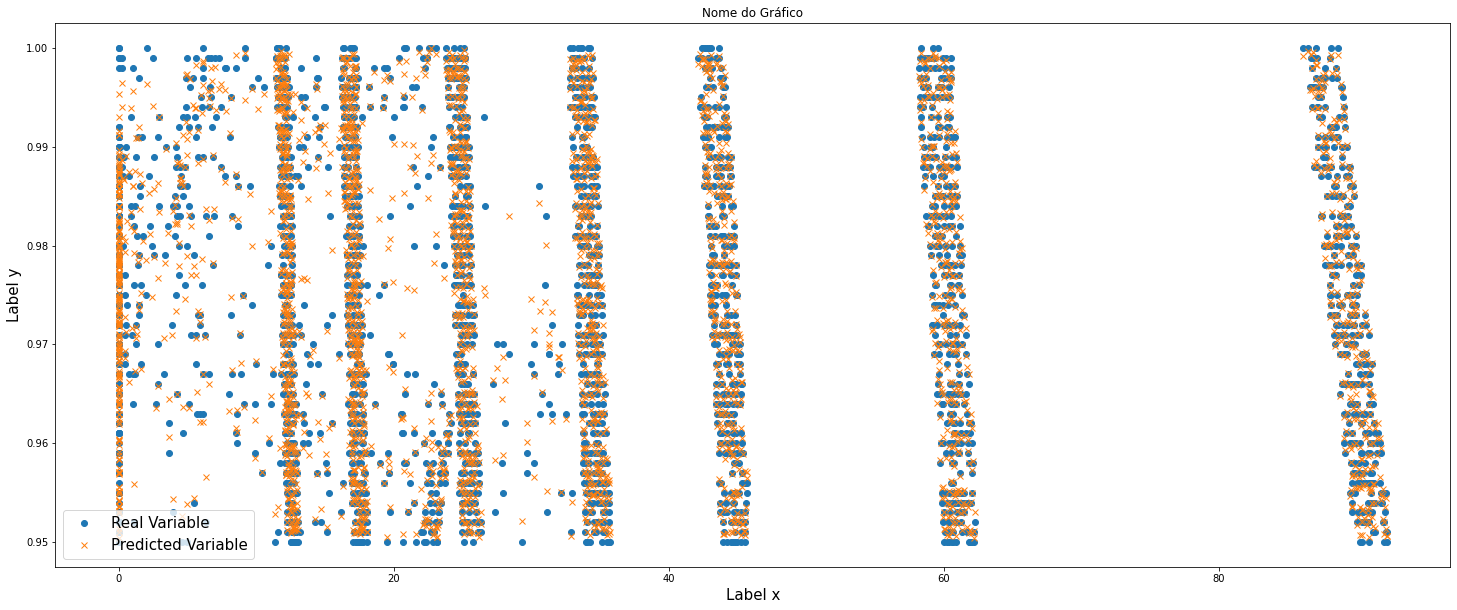

In [ ]:
Graph_prediction(x1_pca_500_test['T_inj_control'], y1_test, y1_PCA1_500_models['Y Predicted Test']['BaggingRegressor'])

Modelos usando features com VIF menor que 250

In [ ]:
features = calculated_vif_y1[calculated_vif_y1['VIF'] < 250].index.to_list()
print('Features (VIF < 250):\n', features)

# Treinando o Modelo com as Features Selecionadas
x1_pca1_250_train = x1_train.loc[:, features]
x1_pca1_250_test = x1_test.loc[:, features]

print('\nModelos:')
y1_PCA1_250_models = train_models(x1_pca1_250_train, y1_train, x1_pca1_250_test, y1_test, models)
y1_PCA1_250_models.drop(['Model'], axis=1)

Features (VIF < 250):
 ['T_inj_control', 'GG_rpm']

Modelos:
[13:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train_Time,Train_Accuracy,Test_Accuracy
SVR,0.004065,-0.000003,-0.000026
KNeighborsRegressor,0.004617,0.941012,0.90785
DecisionTreeRegressor,0.036797,1.0,0.880725
BaggingRegressor,0.237319,0.986723,0.916373
XGBRegressor,0.282119,0.797089,0.774051


###PCA de todas as Features

Precisamos aplicar o Standardization antes de utilizar o PCA

In [ ]:
# Performing Standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Analisando o Principal Component Analysis (PCA)

In [ ]:
components = None 
# None return the same number of original features in the dataset
# floating number between 0<n<1 return the number of components needed to capture the specified percentage of variability in the data
# an integer to indicate how many principal componentes you want to reduce the features to.

pca = PCA(n_components = components)

# Perform PCA on the scaled data
pca.fit(X_scaled)

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[9.75354433e+01 1.82261150e+00 2.48912686e-01 1.58823802e-01
 1.38784127e-01 6.88731250e-02 1.70245538e-02 5.12306744e-03
 2.32578917e-03 1.17974583e-03 6.84937966e-04 1.26871934e-04
 8.64557484e-05 3.19818638e-32]


* Vemos que o primeiro componentes captura 97.7% de variabilidade nos dados
* O segundo 1.8%
* Todos os componentes completam 100%

Text(0, 0.5, 'Explained variance (%)')

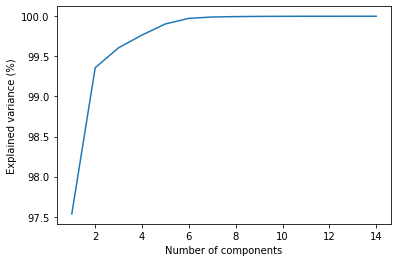

In [ ]:
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1, components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

####Aplicando o PCA

In [ ]:
pca_components = abs(pca.components_)

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

print('\nThe most important features in each component')

for row in range(pca_components.shape[0]): # get the indices of the top 4 values in each row
  temp = np.argpartition(-(pca_components[row]),6)
  # sort the indices in descending order
  indices = temp[np.argsort((-pca_components[row])[temp])][:6]

  # print the top 4 feature names
  print(f'Component {row}: {df.columns[indices].to_list()}')


Cumulative Variances (Percentage):
[97.53544334 99.35805484 99.60696752]
Number of components: 3

The most important features in each component
Component 0: ['GT_C_airOut_pressure', 'HP_T_exit_pressure', 'GT_shaft_torque', 'GT_C_airOut_temp', 'S_prplr_torque', 'P_prplr_torque']
Component 1: ['GG_rpm', 'ship_speed', 'lever_position', 'T_inj_control', 'fuel_flow', 'GT_exhGas_pressure']
Component 2: ['T_inj_control', 'GT_rpm', 'HP_T_exit_temp', 'GT_exhGas_pressure', 'HP_T_exit_pressure', 'GT_C_airOut_pressure']


####Modelagem

In [ ]:
# Splitando os dados em traino e teste
X_pca2_train, X_pca2_test, y1_train, y1_test = train_test_split(X_pca,y1)

In [ ]:
# Aplicando os modelos
y1_models = train_models(X_pca2_train, y1_train, X_pca2_test, y1_test, models)
y1_models.drop(['Model'], axis=1)

[14:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train_Time,Train_Accuracy,Test_Accuracy
SVR,0.006246,-0.000003,-0.000023
KNeighborsRegressor,0.004828,0.988355,0.980333
DecisionTreeRegressor,0.039888,1.0,0.956269
BaggingRegressor,0.247848,0.995953,0.97748
XGBRegressor,0.350435,0.797358,0.773481


Acho menos vantajoso, pois precisa de bastante features

####Y2

In [ ]:
df_corr_y2 = df.corr()['GT_T_decay_coef'].abs().sort_values(ascending=False)
df_corr_y2

GT_T_decay_coef         1.000000e+00
HP_T_exit_temp          3.846390e-02
T_inj_control           1.887184e-02
GT_C_airOut_pressure    1.830336e-02
fuel_flow               1.732675e-02
GT_C_airOut_temp        1.685505e-02
GT_exhGas_pressure      1.179423e-02
GG_rpm                  1.000011e-02
HP_T_exit_pressure      2.718186e-03
GT_shaft_torque         3.576383e-04
S_prplr_torque          1.044235e-04
P_prplr_torque          1.044235e-04
GT_rpm                  1.776556e-05
GT_C_decay_coef         4.064242e-14
lever_position          8.566427e-17
ship_speed              9.367920e-18
Name: GT_T_decay_coef, dtype: float64

###PCA do Top VIF

In [ ]:
features = calculated_vif_y1[calculated_vif_y1['VIF'] < 500].index.to_list()
print('Features (VIF < 500):\n', features)

x1_pca_500 = X.loc[:, features]



Features (VIF < 500):
 ['T_inj_control', 'GG_rpm', 'HP_T_exit_temp']


In [ ]:
# Performing Standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(x1_pca_500)

In [ ]:
components = 2
# None return the same number of original features in the dataset
# floating number between 0<n<1 return the number of components needed to capture the specified percentage of variability in the data
# an integer to indicate how many principal componentes you want to reduce the features to.

pca = PCA(n_components = components)

# Perform PCA on the scaled data
pca.fit(X_scaled)

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[95.31759907  4.1212367 ]


Text(0, 0.5, 'Explained variance (%)')

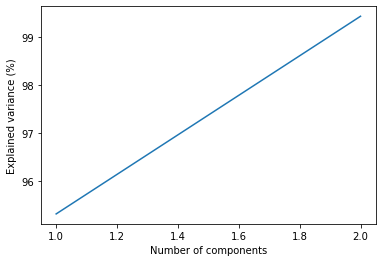

In [ ]:
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1, components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

####Aplicando o PCA

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.57537144 0.56895791 0.58756669]
 [0.62773132 0.76771713 0.12870039]]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

print('\nThe most important features in each component')

for row in range(pca_components.shape[0]): # get the indices of the top 4 values in each row
  temp = np.argpartition(-(pca_components[row]),2)
  # sort the indices in descending order
  indices = temp[np.argsort((-pca_components[row])[temp])][:]

  # print the top 4 feature names
  print(f'Component {row}: {df.columns[indices].to_list()}')

Cumulative Variances (Percentage):
[95.31759907 99.43883577]
Number of components: 2

The most important features in each component
Component 0: ['GT_shaft_torque', 'lever_position', 'ship_speed']
Component 1: ['ship_speed', 'lever_position', 'GT_shaft_torque']


####Modelagem

In [ ]:
#sc = StandardScaler()
#X_scaled = sc.fit_transform(x1_pca_500)

#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_scaled)

# Splitando os dados em traino e teste
X_pca2_train, X_pca2_test, y1_train, y1_test = train_test_split(X_pca,y1)

Redução de Dimensão e PCA

In [ ]:
# Aplicando os modelos
y1_PCA2_500_models = train_models(X_pca2_train, y1_train, X_pca2_test, y1_test, models)
y1_PCA2_500_models.drop(['Model'], axis=1)

[15:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train_Time,Train_Accuracy,Test_Accuracy
SVR,0.002732,-0.000004,-0.000032
KNeighborsRegressor,0.005486,0.931793,0.918566
DecisionTreeRegressor,0.033026,1.0,0.852801
BaggingRegressor,0.208056,0.978771,0.904062
XGBRegressor,0.294209,0.653714,0.634156


Apenas a Redução de Dimensão

In [ ]:
y1_PCA1_500_models.drop(['Model'], axis=1).drop(['Y Predicted Test'], axis=1)

,Train Time,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Train Accuracy (R²),Test Accuracy (R²)
SVR,0.003881,0.013022,0.000225,0.01499,-0.000162,-0.001386
KNeighborsRegressor,0.005749,0.000768,0.000006,0.002416,0.987019,0.973977
DecisionTreeRegressor,0.052414,0.001337,0.00001,0.0031,1.0,0.95718
BaggingRegressor,0.333189,0.000833,0.000006,0.002549,0.996361,0.971038
XGBRegressor,0.342907,0.00521,0.000046,0.006772,0.801908,0.795619


O resultado foi levemente menor.

Seguiremos com os modelos obtidos no y1_PCA1_500_models <br>
KNeighborsRegressor e BaggingRegressor

# Visualização das Predições

In [ ]:
def Graph_prediction2d(X, y_train, y_test, y_pred):

  for i, x in enumerate(X):
    fig = go.Figure([
        go.Scatter(x=X.iloc[:,i], y=y_train, name='Train', mode='markers'),
        go.Scatter(x=X.iloc[:,i], y=y_test, name='Test', mode='markers'),
        go.Scatter(x=X.iloc[:,i], y=y_pred, name='Prediction', mode='markers')
    ])

    fig.update_layout(title=X.columns[i] +  ' x Target',
                      
                        xaxis_title=X.columns[i],
                        yaxis_title='y',
                        
                      width=600, height=500)
    fig.show()

In [ ]:
x_names = ['T_inj_control', 'HP_T_exit_temp', 'GG_rpm']
x_ = x1_test[x_names]

In [ ]:
print('KNeighborsRegressor')
Graph_prediction2d(x_, y1_train, y1_test, y1_PCA1_500_models['Y Predicted Test']['KNeighborsRegressor'])

KNeighborsRegressor


In [ ]:
print('BaggingRegressor')
Graph_prediction2d(x_, y1_train, y1_test, y1_PCA1_500_models['Y Predicted Test']['BaggingRegressor'])

BaggingRegressor


https://github.com/plotly/plotly.py/issues/1085
https://www.google.com/search?q=go.Scatter3d+with+colorbar&source=lmns&bih=969&biw=1920&rlz=1C1GCEU_pt-PTBR940BR940&hl=pt-BR&sa=X&ved=2ahUKEwiowNjogcj6AhWNrJUCHY7nBtkQ_AUoAHoECAEQAA


In [ ]:
def Graph_prediction3d(X, y_test, y_pred):
  x_ = X.iloc[:,0]
  y_ = X.iloc[:,1]
  z_ = X.iloc[:,2]

  # plotly data
  data=[go.Scatter3d(x=x_, y=y_, z=z_,mode='markers',
        marker=dict(
          size=7,
          color=y_test,
          #colorscale='Viridis',
          opacity=0.5,
          symbol='diamond')), # 'circle', 'circle-open', 'cross',
                      # 'diamond', 'diamond-open', 'square', 'square-open', 'x'

        go.Scatter3d(x=x_, y=y_, z=z_,mode='markers',
        marker=dict(
          size=5,
          color=y_pred,
          #colorscale='icefire',
          opacity=1,
          symbol='circle'))]

  fig = go.Figure(data)
  fig.update_layout(title='Main Features x Target',
                    scene=dict(
                    xaxis_title=X.columns[0],
                    yaxis_title=X.columns[1],
                    zaxis_title=X.columns[2]),          
                    width=700, height=700)

  fig.show()

In [ ]:
print('KNeighborsRegressor')
Graph_prediction3d(x_, y1_test, y1_PCA1_500_models['Y Predicted Test']['BaggingRegressor'])

KNeighborsRegressor


In [ ]:
print('BaggingRegressor')
Graph_prediction3d(x_, y1_test, y1_PCA1_500_models['Y Predicted Test']['BaggingRegressor'])

BaggingRegressor


In [ ]:
x_.iloc[:,2]

295      9320.149
10768    8451.466
6112     6772.049
11209    8470.979
303      9135.424
           ...   
1277     9781.239
8787     7736.542
2173     8492.387
2050     9320.813
5340     7784.011
Name: GG_rpm, Length: 2984, dtype: float64

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=x_.iloc[:,0], y=x_.iloc[:,1], z=x_.iloc[:,2],  color=y1_test)
fig.show()



# Aprimoramento dos Parâmetros

GridSearchCV

#Conclusões

#Salvar o Modelo

MLOps